In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.serif'] = ['SimHei']
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
f = open('D:\Jupyter\利用Python进行数据分析2\yjx\Python-\homework\data\CDNOW.txt')
columns = ['user_id','buy_date','buy_counts','buy_cost']
data = pd.read_table(f,names=columns,sep='\s+')
data.head()

,user_id,buy_date,buy_counts,buy_cost
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_id       69659 non-null int64
buy_date      69659 non-null int64
buy_counts    69659 non-null int64
buy_cost      69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


### 商品销售静态分析

In [3]:
data['buy_counts'].sum()

167881

In [4]:
data['buy_cost'].sum()

2500315.6300000004

In [5]:
data['buy_counts'].describe()

count    69659.000000
mean         2.410040
std          2.333924
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         99.000000
Name: buy_counts, dtype: float64

In [6]:
data['buy_cost'].describe()

count    69659.000000
mean        35.893648
std         36.281942
min          0.000000
25%         14.490000
50%         25.980000
75%         43.700000
max       1286.010000
Name: buy_cost, dtype: float64

### 商品销售动态分析

In [ ]:
#一段时间内都没有回购 大部分人次数和金额差不多

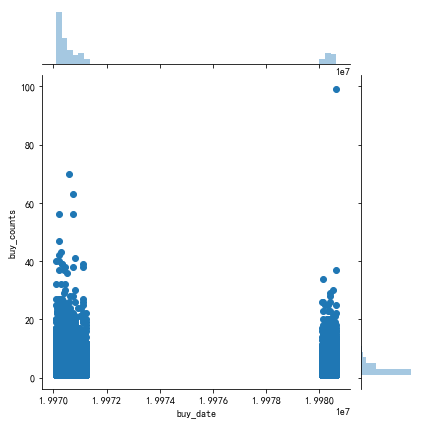

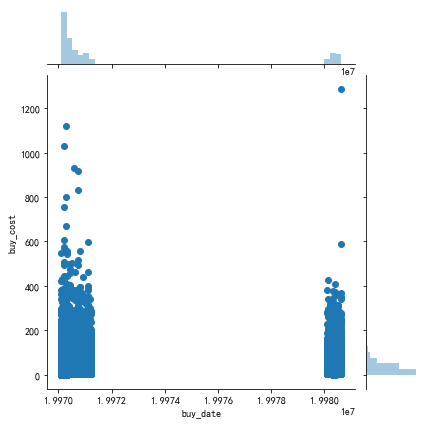

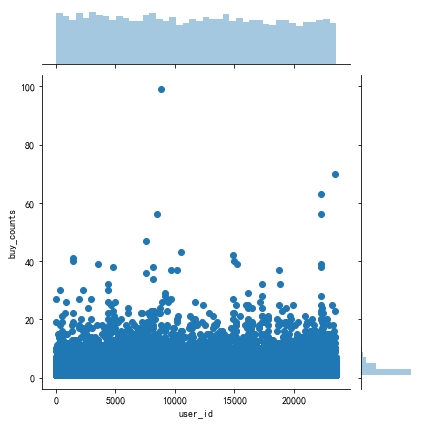

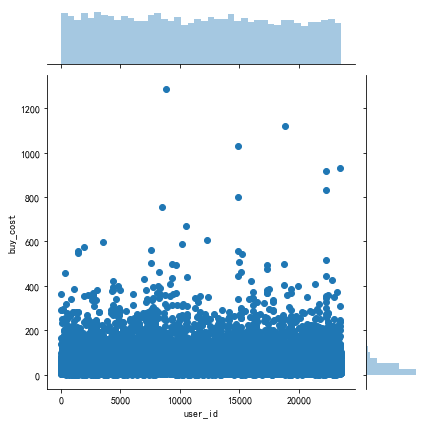

In [10]:
#p = sns.color_palette()
#fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.jointplot(data=data,x='buy_date',y='buy_counts')
#ax1.legend()
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.jointplot(data=data,x='buy_date',y='buy_cost')
#ax2.legend()
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.jointplot(data=data,x='user_id',y='buy_counts')
#ax3.legend()
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.jointplot(data=data,x='user_id',y='buy_cost')
#ax4.legend()
plt.show()

In [11]:
data.isnull()

,user_id,buy_date,buy_counts,buy_cost
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


### 用户消费行为静态分析

In [ ]:
#sns.swarmplot(data=data,x='buy_date',y='buy_counts')

In [12]:
t = data.groupby(['user_id'],as_index=False)['buy_counts'].sum()
print(t.head(10))
print(t.shape)

   user_id  buy_counts
0        1           1
1        2           6
2        3          16
3        4           7
4        5          29
5        6           1
6        7          18
7        8          18
8        9           6
9       10           3
(23570, 2)


In [13]:
t2 = data.groupby(['user_id'],as_index=False)['buy_cost'].sum()
print(t2.head(10))
print(t2.shape)

   user_id  buy_cost
0        1     11.77
1        2     89.00
2        3    156.46
3        4    100.50
4        5    385.61
5        6     20.99
6        7    264.67
7        8    197.66
8        9     95.85
9       10     39.31
(23570, 2)


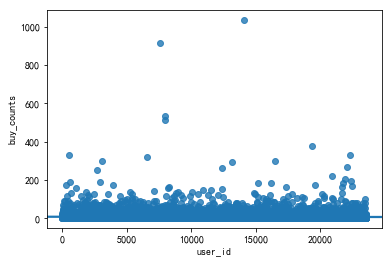

In [14]:
sns.regplot(x='user_id',y='buy_counts',data=t)

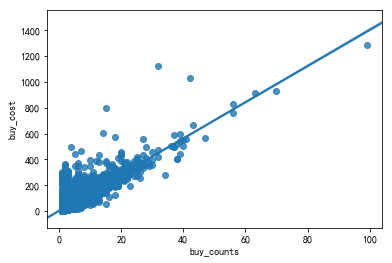

In [15]:
sns.regplot(x='buy_counts',y='buy_cost',data=data)  #总体来说，买的次数越多，购买金额越多 应该是回头客 建议多给这些用户发信息

## 用户动态行为分析（主要是时间序列的处理）

In [17]:
data['buy_date'] = pd.to_datetime(data.buy_date,format='%Y%m%d')
data['month'] = data.buy_date.values.astype('datetime64[M]')    #按月处理一下
data.head()

,user_id,buy_date,buy_counts,buy_cost,month
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-01


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 5 columns):
user_id       69659 non-null int64
buy_date      69659 non-null datetime64[ns]
buy_counts    69659 non-null int64
buy_cost      69659 non-null float64
month         69659 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2)
memory usage: 2.7 MB


In [ ]:
#user_first_buy = data.groupby(['user_id'],as_index=False)['buy_date'].first()
#print(user_first_buy.head())
#print(user_first_buy.shape)

In [ ]:
#user_last_buy = data.groupby(['user_id'],as_index=False)['buy_date'].last()
#print(user_last_buy.head())
#print(user_last_buy.shape)

In [19]:
user_group = data.groupby('user_id').sum()
user_group.head()

,buy_counts,buy_cost
user_id,,
1,1,11.77
2,6,89.00
3,16,156.46
4,7,100.50
5,29,385.61


In [20]:
user_group.describe()

,buy_counts,buy_cost
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


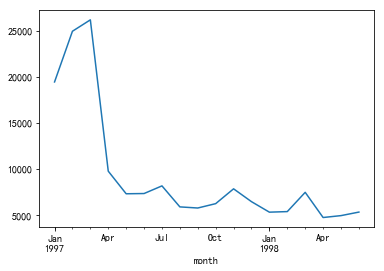

In [21]:
data.groupby('month').buy_counts.sum().plot() #前期买的次数多，后面逐渐下降

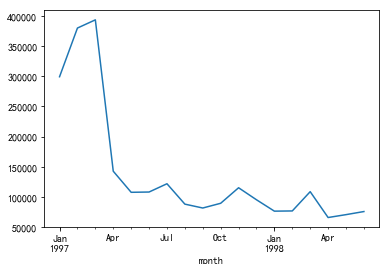

In [22]:
data.groupby('month').buy_cost.sum().plot()

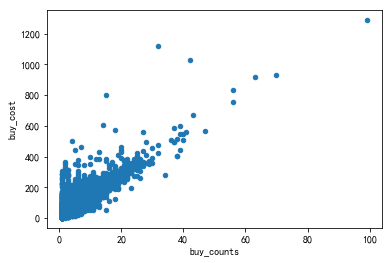

In [23]:
data.plot.scatter(x='buy_counts',y='buy_cost')  #与上面分析一致 次数和金额成正比

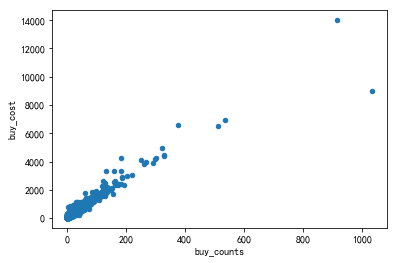

In [24]:
#看看用户是否有造假
data.groupby('user_id').sum().plot.scatter(x='buy_counts',y='buy_cost')
#结果很正常

### 看看消费的时间

In [27]:
data.groupby('user_id').month.min().value_counts()  #第一次消费时间

1997-02-01    8476
1997-01-01    7846
1997-03-01    7248
Name: month, dtype: int64

In [28]:
data.groupby('user_id').month.max().value_counts()  #最后一次消费时间

1997-02-01    4912
1997-03-01    4478
1997-01-01    4192
1998-06-01    1506
1998-05-01    1042
1998-03-01     993
1998-04-01     769
1997-04-01     677
1997-12-01     620
1997-11-01     609
1998-02-01     550
1998-01-01     514
1997-06-01     499
1997-07-01     493
1997-05-01     480
1997-10-01     455
1997-09-01     397
1997-08-01     384
Name: month, dtype: int64

### 消费中的复购率和回购率  数据透视

#### pivot_table参数中，index是设置数据透视后的索引，column是设置数据透视后的列，简而言之，index是你想要的行，column是想要的列values是将哪个值进行计算，aggfunc是用哪种方法

In [32]:
pivoted_counts = data.pivot_table(index='user_id',columns='month',values='buy_date',aggfunc='count').fillna(0)
column_month = data.month.sort_values().astype('str').unique()
pivoted_counts.columns = column_month
pivoted_counts.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


#### 复购率的定义是在某时间窗口内消费两次及以上的用户在总消费用户中占比

#### 消费两次及以上记为1，消费一次记为0，没有消费记为NaN  lambda没有elif的用法

In [33]:
pivoted_counts_train = pivoted_counts.applymap(lambda x: 1 if x > 1 else np.NaN if x== 0 else 0)
pivoted_counts_train.head()   

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


In [38]:
plt.style.use('ggplot')

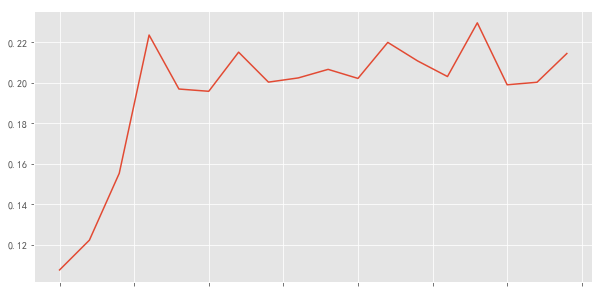

In [39]:
#sum和count相除即可计算出复购率
fig = plt.figure(figsize=(10, 5))
(pivoted_counts_train.sum() / pivoted_counts_train.count()).plot()

#### 回购率 是某一个时间窗口内消费的用户，在下一个时间窗口仍旧消费的占比。我1月消费用户1000，他们中有300个2月依然消费，回购率是30%  俗话说的回头客

In [40]:
pivoted_amount = data.pivot_table(index='user_id',columns='month',values='buy_counts',aggfunc='mean').fillna(0)
column_month = data.month.sort_values().astype('str').unique()
pivoted_amount.columns = column_month
pivoted_amount.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.5,3.0,0.0,3.0,3.0,2.0,2.0,0.0,3.0,0.0,0.0,3.5,3.0,0.0,0.0,0.0,0.0,0.0


In [50]:
pivoted_buy = pivoted_amount.applymap(lambda x: 1 if x > 0 else 0)
pivoted_buy.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [59]:
def buy_return(data):
    status = []
    for i in range(17):
        if data[i] == 1:
            if data[i+1] == 1:
                status.append(1)
            if data[i+1] == 0:
                status.append(0)
        else:
            status.append(np.NaN)
    status.append(np.NaN)
    return pd.Series(status)
pivoted_buy_return = pivoted_buy.apply(buy_return,axis=1)
pivoted_buy_return.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
#如果用户本月进行过消费，且下月消费过，记为1，没有消费过是0。本月若没有进行过消费，为NaN，后续的统计中进行排除。

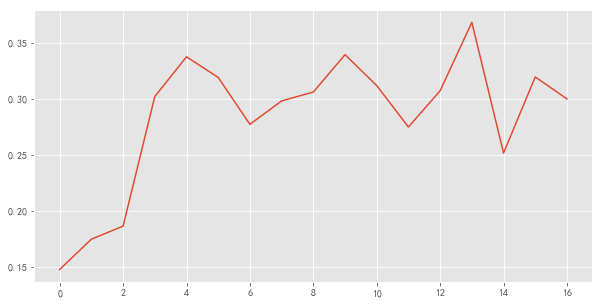

In [60]:
fig = plt.figure(figsize=(10, 5))
(pivoted_buy_return.sum() / pivoted_buy_return.count()).plot()

### 结论： 老顾客比新顾客好一点

### 用户分层  新用户、活跃用户、不活跃用户、回流用户。

In [62]:
def active_status(data):
    status = []
    for i in range(18):
        #无消费
        if data[i] == 0:
            if len(status) > 0:
                if status[i-1] == 'unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
            else:
                status.append('unreg')
        #本月有消费
        else:
            if len(status) == 0:
                status.append('new')
            else:
                if status[i-1] == 'unactive':
                    status.append('return')
                elif status[i-1] == 'unreg':
                    status.append('new')
                else:
                    status.append('active')
    return pd.Series(status)
pivoted_buy_status = pivoted_buy.apply(lambda x:active_status(x),axis=1)
pivoted_buy_status.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
user_id,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive


In [64]:
buy_status_counts = pivoted_buy_status.replace('unreg',np.NaN).apply(lambda x:pd.value_counts(x))
buy_status_counts

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
active,NaN,1157.0,1681,1773.0,852.0,747.0,746.0,604.0,528.0,532.0,624.0,632.0,512.0,472.0,571.0,518.0,459.0,446.0
new,7846.0,8476.0,7248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
return,NaN,NaN,595,1049.0,1362.0,1592.0,1434.0,1168.0,1211.0,1307.0,1404.0,1232.0,1025.0,1079.0,1489.0,919.0,1029.0,1060.0
unactive,NaN,6689.0,14046,20748.0,21356.0,21231.0,21390.0,21798.0,21831.0,21731.0,21542.0,21706.0,22033.0,22019.0,21510.0,22133.0,22082.0,22064.0


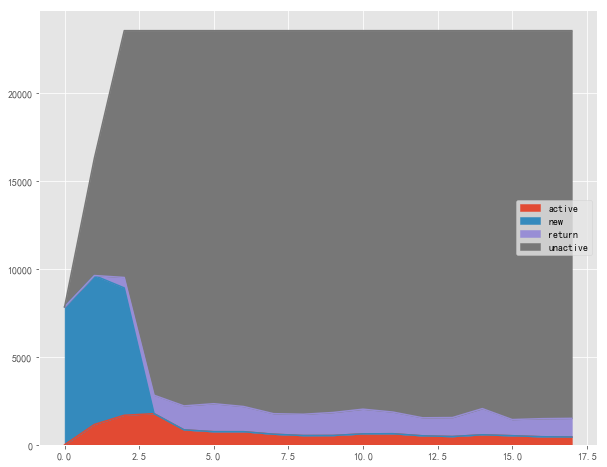

In [65]:
buy_status_counts.fillna(0).T.plot.area(figsize = (10,8))  #生成面积图它只是某时间段消费过的用户的后续行为，蓝色和灰色区域都可以不看。
                                                  #只看紫色回流和红色活跃这两个分层，用户数比较稳定。这两个分层相加，就是消费用户占比

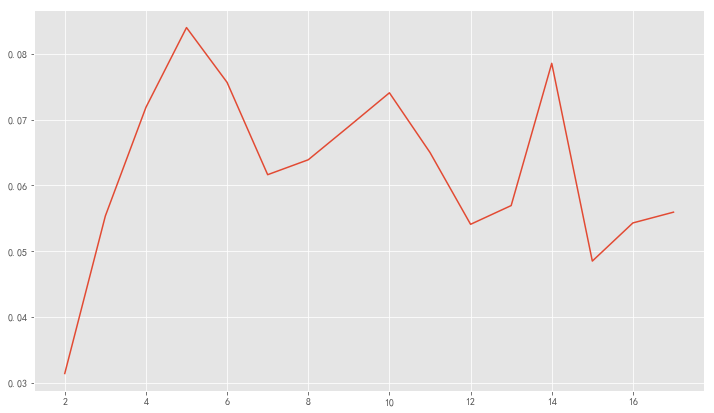

In [66]:
return_rata = buy_status_counts.apply(lambda x:x / x.sum(),axis=1)
return_rata.loc['return'].plot(figsize=(12,7))

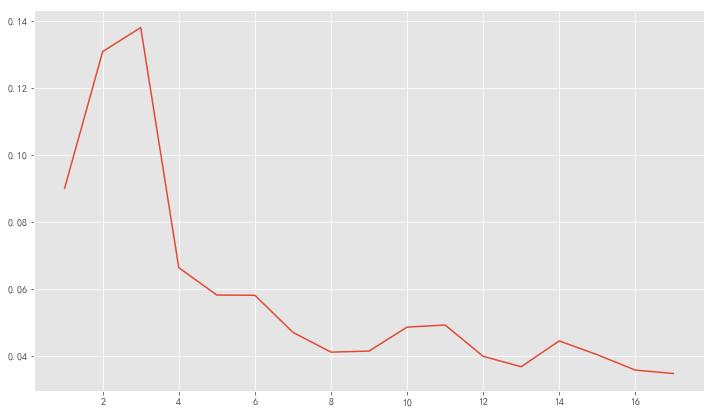

In [67]:
#回流占比，就是回流用户在总用户中的占比 回流率，指上个月多少不活跃/消费用户在本月活跃/消费
return_rata.loc['active'].plot(figsize=(12,7))

### 我们需要知道高质量用户为消费贡献了多少份额。

In [68]:
user_cost = data.groupby('user_id').buy_cost.sum().sort_values().reset_index()
user_cost['cost_cumsum'] = user_cost.buy_cost.cumsum()
user_cost.tail()

,user_id,buy_cost,cost_cumsum
23565,7931,6497.18,2463822.60
23566,19339,6552.70,2470375.30
23567,7983,6973.07,2477348.37
23568,14048,8976.33,2486324.70
23569,7592,13990.93,2500315.63


In [70]:
cost_total = user_cost.cost_cumsum.max()
user_cost['prop'] = user_cost.apply(lambda x:x.cost_cumsum / cost_total,axis = 1)
user_cost.tail()

,user_id,buy_cost,cost_cumsum,prop
23565,7931,6497.18,2463822.60,0.985405
23566,19339,6552.70,2470375.30,0.988025
23567,7983,6973.07,2477348.37,0.990814
23568,14048,8976.33,2486324.70,0.994404
23569,7592,13990.93,2500315.63,1.000000


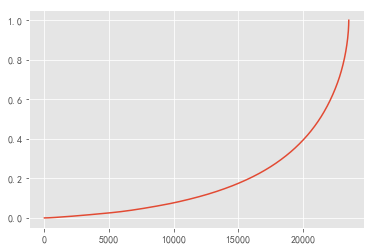

In [71]:
user_cost.prop.plot()   #转换成百分比      横坐标是按贡献金额大小排序而成，纵坐标则是用户累计贡献。
                       # 可以很清楚的看到，前20000个用户贡献了40%的消费。后面4000位用户贡献了60%，确实呈现28倾向

### 计算用户生命周期 统计出用户第一次消费和最后一次消费的时间，相减，得出每一位用户的生命周期

In [73]:
user_cost = data[['user_id','buy_counts','buy_cost','buy_date']]
buy_date_min = user_cost.groupby('user_id').buy_date.min()
buy_date_max = user_cost.groupby('user_id').buy_date.max()

In [74]:
(buy_date_max - buy_date_min).head(10)

user_id
1      0 days
2      0 days
3    511 days
4    345 days
5    367 days
6      0 days
7    445 days
8    452 days
9    523 days
10     0 days
Name: buy_date, dtype: timedelta64[ns]

In [76]:
(buy_date_max - buy_date_min).describe()

count                       23570
mean     134 days 20:55:36.987696
std      180 days 13:46:43.039788
min               0 days 00:00:00
25%               0 days 00:00:00
50%               0 days 00:00:00
75%             294 days 00:00:00
max             544 days 00:00:00
Name: buy_date, dtype: object

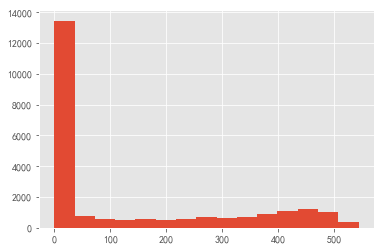

In [77]:
((buy_date_max - buy_date_min) / np.timedelta64(1,'D')).hist(bins = 15)

In [78]:
life_time = (buy_date_max - buy_date_min).reset_index()
life_time.head()

,user_id,buy_date
0,1,0 days
1,2,0 days
2,3,511 days
3,4,345 days
4,5,367 days


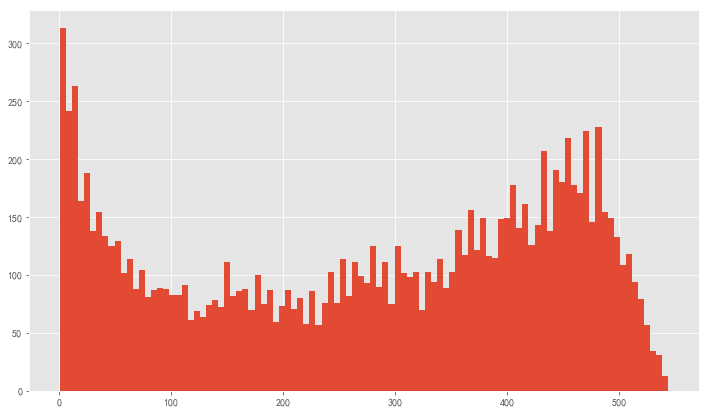

In [79]:
life_time['life_time'] = life_time.buy_date / np.timedelta64(1,'D')
life_time[life_time.life_time > 0].life_time.hist(bins = 100,figsize=(12,7))

In [80]:
life_time[life_time.life_time > 0].life_time.mean()

276.0448072247308

### 留存率也是消费分析领域的经典应用。它指用户在第一次消费后，有多少比率进行第二次消费。和回流率的区别是留存倾向于计算第一次消费，并且有多个时间窗口。

In [81]:
user_cost_retention = pd.merge(left = user_cost,right= buy_date_min.reset_index(),how='inner',on='user_id',suffixes=('','_min'))
user_cost_retention.head(5)

,user_id,buy_counts,buy_cost,buy_date,buy_date_min
0,1,1,11.77,1997-01-01,1997-01-01
1,2,1,12.00,1997-01-12,1997-01-12
2,2,5,77.00,1997-01-12,1997-01-12
3,3,2,20.76,1997-01-02,1997-01-02
4,3,2,20.76,1997-03-30,1997-01-02


In [82]:
user_cost_retention['buy_date_diff'] = user_cost_retention.buy_date - user_cost_retention.buy_date_min
user_cost_retention.head()             #用户每一次消费距第一次消费的时间差值。

,user_id,buy_counts,buy_cost,buy_date,buy_date_min,buy_date_diff
0,1,1,11.77,1997-01-01,1997-01-01,0 days
1,2,1,12.00,1997-01-12,1997-01-12,0 days
2,2,5,77.00,1997-01-12,1997-01-12,0 days
3,3,2,20.76,1997-01-02,1997-01-02,0 days
4,3,2,20.76,1997-03-30,1997-01-02,87 days


In [83]:
date_trans = lambda x:x/np.timedelta64(1,'D')
user_cost_retention['date_diff'] = user_cost_retention.buy_date_diff.apply(date_trans)
user_cost_retention.head()

,user_id,buy_counts,buy_cost,buy_date,buy_date_min,buy_date_diff,date_diff
0,1,1,11.77,1997-01-01,1997-01-01,0 days,0.0
1,2,1,12.00,1997-01-12,1997-01-12,0 days,0.0
2,2,5,77.00,1997-01-12,1997-01-12,0 days,0.0
3,3,2,20.76,1997-01-02,1997-01-02,0 days,0.0
4,3,2,20.76,1997-03-30,1997-01-02,87 days,87.0


In [85]:
#将时间差值分桶
bin = [0,3,7,15,30,60,90,180,365]
user_cost_retention['date_diff_bin'] = pd.cut(user_cost_retention.date_diff,bins = bin)
user_cost_retention.head()

,user_id,buy_counts,buy_cost,buy_date,buy_date_min,buy_date_diff,date_diff,date_diff_bin
0,1,1,11.77,1997-01-01,1997-01-01,0 days,0.0,NaN
1,2,1,12.00,1997-01-12,1997-01-12,0 days,0.0,NaN
2,2,5,77.00,1997-01-12,1997-01-12,0 days,0.0,NaN
3,3,2,20.76,1997-01-02,1997-01-02,0 days,0.0,NaN
4,3,2,20.76,1997-03-30,1997-01-02,87 days,87.0,"(60, 90]"


In [86]:
pivoted_retention = user_cost_retention.pivot_table(index='user_id',columns='date_diff_bin',values='buy_cost',aggfunc=sum)
pivoted_retention.head()

date_diff_bin,"(0, 3]","(3, 7]","(7, 15]","(15, 30]","(30, 60]","(60, 90]","(90, 180]","(180, 365]"
user_id,,,,,,,,
3,NaN,NaN,NaN,NaN,NaN,40.3,NaN,78.41
4,NaN,NaN,NaN,29.73,NaN,NaN,NaN,41.44
5,NaN,NaN,13.97,NaN,38.90,NaN,110.40,155.54
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.43
8,NaN,NaN,NaN,NaN,13.97,NaN,45.29,104.17


In [87]:
pivoted_retention.mean()

date_diff_bin
(0, 3]        35.905798
(3, 7]        36.385121
(7, 15]       42.669895
(15, 30]      45.964649
(30, 60]      50.215070
(60, 90]      48.975277
(90, 180]     67.223297
(180, 365]    91.960059
dtype: float64

In [88]:
#看整体中有多少用户在0～3天消费
pivoted_retention_trans = pivoted_retention.fillna(0).applymap(lambda x:1 if x>0 else 0)
pivoted_retention_trans.head()

date_diff_bin,"(0, 3]","(3, 7]","(7, 15]","(15, 30]","(30, 60]","(60, 90]","(90, 180]","(180, 365]"
user_id,,,,,,,,
3,0,0,0,0,0,1,0,1
4,0,0,0,1,0,0,0,1
5,0,0,1,0,1,0,1,1
7,0,0,0,0,0,0,0,1
8,0,0,0,0,1,0,1,1


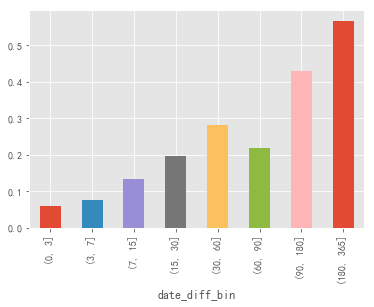

In [89]:
(pivoted_retention_trans.sum() / pivoted_retention_trans.count()).plot.bar()

### 用户平均购买周期

In [90]:
groouped = user_cost_retention.groupby('user_id')
i = 0 
for user,group in groouped:
    print(group)
    i += 1
    if i == 2:
        break

   user_id  buy_counts  buy_cost   buy_date buy_date_min buy_date_diff  \
0        1           1     11.77 1997-01-01   1997-01-01        0 days   

   date_diff date_diff_bin  
0        0.0           NaN  
   user_id  buy_counts  buy_cost   buy_date buy_date_min buy_date_diff  \
1        2           1      12.0 1997-01-12   1997-01-12        0 days   
2        2           5      77.0 1997-01-12   1997-01-12        0 days   

   date_diff date_diff_bin  
1        0.0           NaN  
2        0.0           NaN  


In [91]:
def diff(group):
    d = group.date_diff - group.date_diff.shift(-1)
    return d
last_diff = user_cost_retention.groupby('user_id').apply(diff)
last_diff.head()

user_id   
1        0     NaN
2        1     0.0
         2     NaN
3        3   -87.0
         4    -3.0
Name: date_diff, dtype: float64

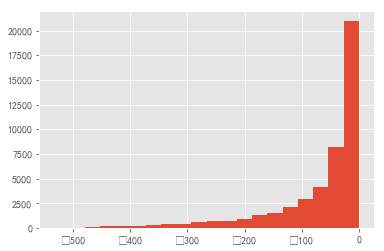

In [92]:
last_diff.hist(bins = 20)

In [ ]:
#典型的长尾分布，大部分用户的消费间隔确实比较短。不妨将时间召回点设为消费后立即赠送优惠券，
#消费后10天询问用户怎么样，消费后30天提醒优惠券到期，消费后60天短信推送。这便是数据的应用了。